In [1]:
import pandas as pd
import geopandas as gpd
import skfuzzy as fuzz
import numpy as np 
from skfuzzy import control as ctrl

In [2]:
ones = ctrl.Antecedent(np.arange(0,1, 0.01), 'ones')
speed = ctrl.Antecedent(np.arange(0,30,0.1), 'speed')
resting = ctrl.Consequent(np.arange(0,1,0.01), 'resting')
High = ctrl.Consequent(np.arange(0,1,0.01), 'High_act')
low = ctrl.Consequent(np.arange(0,1,0.01), 'low_act')
myfeat = [ones,speed,resting,High,low]

c:\ProgramData\Anaconda3\envs\geopandas_docs\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


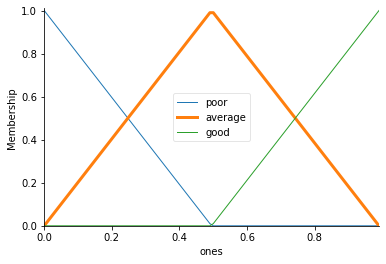

In [3]:
for x in myfeat:
    x.automf(3)
ones['average'].view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

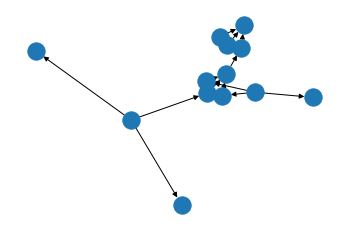

In [4]:
rule1 = ctrl.Rule(ones['poor'], resting['good'])
rule2 = ctrl.Rule(ones['poor'], low['poor'])
rule3 = ctrl.Rule(ones['poor'], High['poor'])
rule4 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], resting['poor'])
rule5 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], low['average'])
rule6 = ctrl.Rule(ones['good'] & speed['good'] | speed['average'], High['good'])
rule7 = ctrl.Rule(ones['good'] & speed['poor'], resting['poor'])
rule8 = ctrl.Rule(ones['good'] & speed['poor'], low['good'])
rule9 = ctrl.Rule(ones['good'] & speed['poor'], High['good'])
rule4.view()

In [5]:
rule_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
fuzzysys = ctrl.ControlSystemSimulation(rule_ctrl)

0.4949999999999999


c:\ProgramData\Anaconda3\envs\geopandas_docs\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


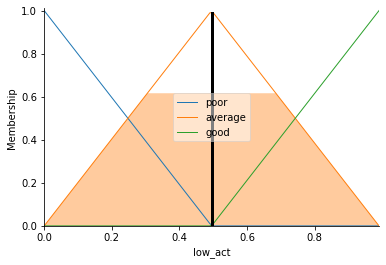

In [6]:
fuzzysys.input['ones'] = 0.8
fuzzysys.input['speed'] = 50
fuzzysys.compute()
print(fuzzysys.output['low_act'])
low.view(sim = fuzzysys)

In [30]:
df = gpd.read_file(r'804HMM_SP.shp')
# df = df.dropna()
df[df['speed'] < 50]
df

,GMT Time,Latitude,Longitude,Altitude,Duration,Temperatur,Voltage,DOP,Satellites,Cause of F,...,Lab_Alt,No,time,distance,speed,Status,MT Time,ones,zeros,geometry
0,6/29/2021 15:45,36.552564,-109.229510,1981.56,17,18.5,0,1.4,5,GPS Schedule,...,0.0,1,6/29/2021 9:45,-1.000000,-1.000000,7.80262,2021-06-29 09:45:00,0.627119,0.372881,POINT (658456.859 4046697.092)
1,6/29/2021 16:00,36.552524,-109.229797,1996.00,13,19.0,0,1.4,5,GPS Schedule,...,0.0,2,6/29/2021 10:00,26.105617,0.851782,27.45260,2021-06-29 10:00:00,0.322034,0.677966,POINT (658431.226 4046692.148)
2,6/29/2021 16:15,36.552558,-109.229876,1992.61,2,18.0,0,1.6,5,GPS Schedule,...,0.0,3,6/29/2021 10:15,7.965648,0.872150,34.98820,2021-06-29 10:15:00,0.220339,0.779661,POINT (658424.130 4046695.768)
3,6/29/2021 16:30,36.552388,-109.229662,1997.95,4,18.0,0,1.6,5,GPS Schedule,...,0.0,4,6/29/2021 10:30,26.920335,1.429001,19.27080,2021-06-29 10:30:00,0.423729,0.576271,POINT (658443.659 4046677.239)
4,6/29/2021 16:45,36.552149,-109.229825,2001.79,2,18.0,0,1.6,5,GPS Schedule,...,0.0,5,6/29/2021 10:45,30.239686,1.194796,48.58300,2021-06-29 10:45:00,0.627119,0.372881,POINT (658429.557 4046650.489)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5010,10/8/2021 7:30,36.552540,-109.229463,1986.93,16,18.5,0,1.2,7,GPS Schedule,...,0.0,6042,10/8/2021 1:30,1.321173,0.144084,5.58644,2021-10-08 01:30:00,1.000000,0.000000,POINT (658461.107 4046694.440)
5011,10/8/2021 9:00,36.552571,-109.229495,1990.71,35,21.5,0,1.8,5,GPS Schedule,...,0.0,6043,10/8/2021 3:00,4.442191,0.195415,8.33749,2021-10-08 03:00:00,1.000000,0.000000,POINT (658458.207 4046697.805)
5012,10/8/2021 10:30,36.552545,-109.229516,1989.45,23,19.5,0,5.6,4,GPS Schedule,...,0.0,6044,10/8/2021 4:30,3.374405,0.192581,5.91568,2021-10-08 04:30:00,0.983051,0.016949,POINT (658456.370 4046694.974)
5013,10/8/2021 12:00,36.552580,-109.229494,1999.36,35,18.5,0,2.0,5,GPS Schedule,...,0.0,6045,10/8/2021 6:00,4.328849,0.225724,9.39000,2021-10-08 06:00:00,1.000000,0.000000,POINT (658458.277 4046698.860)


In [32]:
ind_list = df.index.to_list()
df['Resting'] = None
df['Low_activity'] = None
df['High_activity'] = None
for x in ind_list:
    ones = df.loc[x,'ones']
    speed=  df.loc[x,'speed']
    fuzzysys.input['ones'] = ones
    fuzzysys.input['speed'] = speed
    fuzzysys.compute()
    df.loc[x,'Resting'] = float(fuzzysys.output['resting'])
    df.loc[x,'Low_activity'] = float(fuzzysys.output['low_act'])
    df.loc[x,'High_activity'] = float(fuzzysys.output['High_act'])

In [33]:
df.loc[:,'Resting'] = df.loc[:,'Resting'].astype('float')
df.loc[:,'Low_activity'] = df.loc[:,'Low_activity'].astype('float')
df.loc[:,'High_activity']= df.loc[:,'High_activity'].astype('float')

In [34]:
df.to_file('804_HMMSup_FZ.shp')

C:\Users\chris\AppData\Local\Temp/ipykernel_7344/3760548109.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('804_HMMSup_FZ.shp')
